In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
from datasets import load_dataset

dataset = load_dataset(
    "ai4bharat/IndicCorpV2",
    name="indiccorp_v2",
    split="guj_Gujr",
    streaming=True
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

In [3]:
rows = []
for i, row in enumerate(dataset):
    rows.append(row)
    if i == 300000:
        break

df = pd.DataFrame(rows)
df = df.dropna(subset=["text"])
df = df[df["text"].str.strip() != ""]
df.head()


,text
0,આ વીડિયો જુઓ: ઊંઝા માર્કેટયાર્ડ આજથી 25 જુલાઈ ...
2,મિથેનોલ આવ્યો ક્યાંથી?
4,આખરે ત્રણ રાજ્યોમાં મળેલ હાર પર કોંગ્રેસ અધ્યક...
6,"આ આંકડો માટે, અને વજન ઘટાડવા માટે પ્રકાશનનો દિ..."
8,આ ઠેકાઓ પરથી લીમડી તેમજ ઝાલોદના બૂટલેગરો વિદેશ...


In [4]:
def tokenize(text):
    """
    A simple tokenizer for Gujarati text.
    - Removes punctuation, numbers, and extra spaces
    - Splits by whitespace
    """
    # Keep only Gujarati letters and spaces
    text = re.sub(r"[^ઁ-૿\s]", " ", text)
    tokens = text.split()
    return tokens

# Apply tokenization to entire dataset
tokenized_data = []
for sentence in df["text"]:
    tokenized_data.extend(tokenize(sentence))

print("Sample tokens:", tokenized_data[:20])
print("Total tokens:", len(tokenized_data))

Sample tokens: ['આ', 'વીડિયો', 'જુઓ', 'ઊંઝા', 'માર્કેટયાર્ડ', 'આજથી', 'જુલાઈ', 'સુધી', 'બંધ', 'મિથેનોલ', 'આવ્યો', 'ક્યાંથી', 'આખરે', 'ત્રણ', 'રાજ્યોમાં', 'મળેલ', 'હાર', 'પર', 'કોંગ્રેસ', 'અધ્યક્ષ']
Total tokens: 6216249


In [5]:
freq_dict = {}
for word in tokenized_data:
    word = word.strip()
    if word:
        if word not in freq_dict:
            freq_dict[word] = 1
        else:
            freq_dict[word] += 1

print(f"Total unique words: {len(freq_dict)}")

Total unique words: 309437


In [6]:
sorted_freq = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)

# Top 100 words
top_100 = sorted_freq[:100]
print(top_100[:10])

[('છે', 266558), ('અને', 121171), ('આ', 78206), ('કે', 69115), ('પણ', 55091), ('માટે', 54867), ('એક', 41233), ('કરી', 40950), ('પર', 40146), ('તે', 35978)]


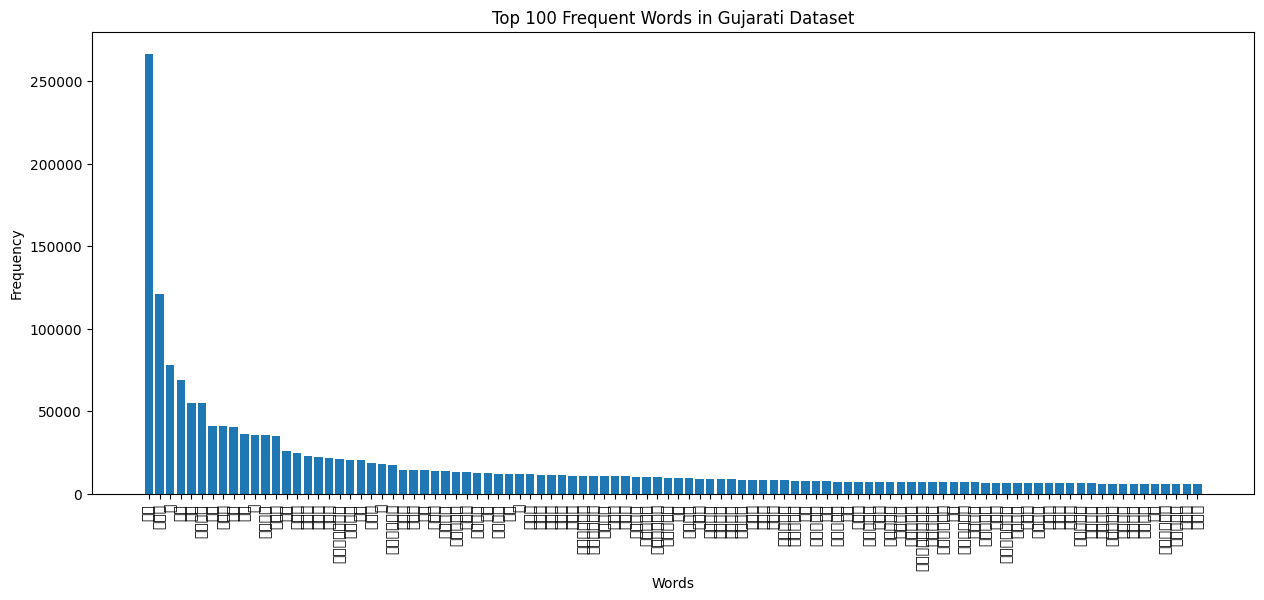

In [8]:
words = [w for w, _ in top_100]
counts = [c for _, c in top_100]

plt.figure(figsize=(15, 6))
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title("Top 100 Frequent Words in Gujarati Dataset")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [9]:
def remove_stopwords_by_threshold(freq_dict, threshold):
    """
    Remove words that appear more than 'threshold' times.
    """
    return {word: freq for word, freq in freq_dict.items() if freq <= threshold}

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2697 (\N{GUJARATI LETTER U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2733 (\N{GUJARATI LETTER BHA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2721 (\N{GUJARATI LETTER DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2717 (\N{GUJARATI LETTER JHA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2712 (\N{GUJARATI LETTER GHA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/l

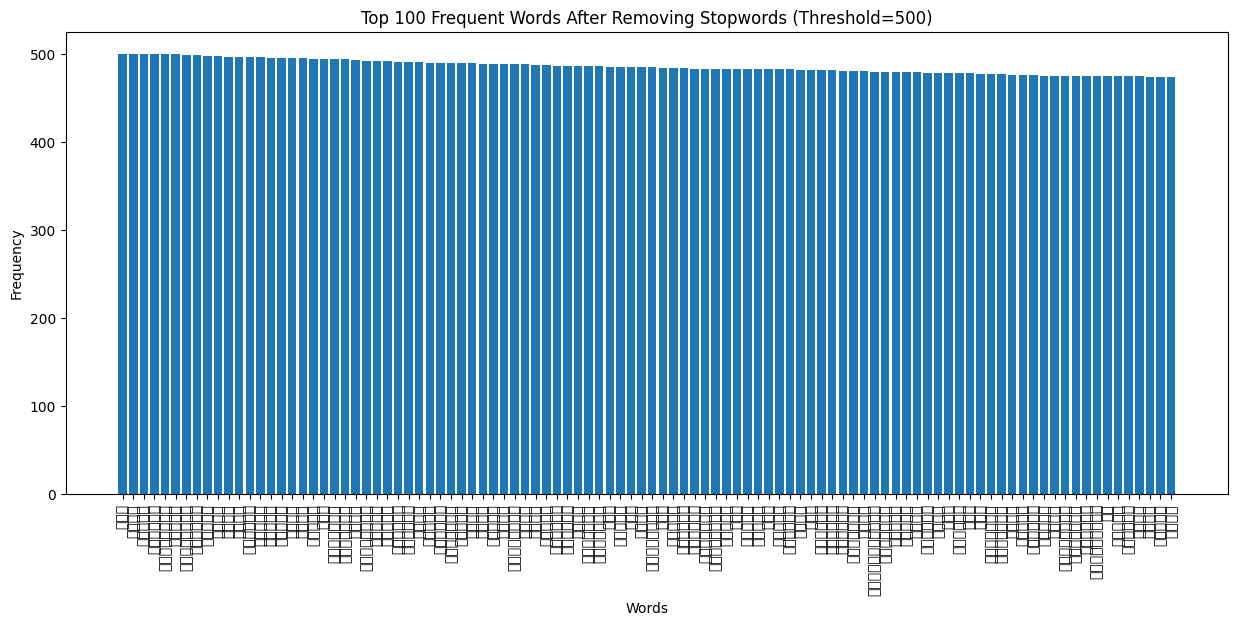

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2795 (\N{GUJARATI DIGIT FIVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2799 (\N{GUJARATI DIGIT NINE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


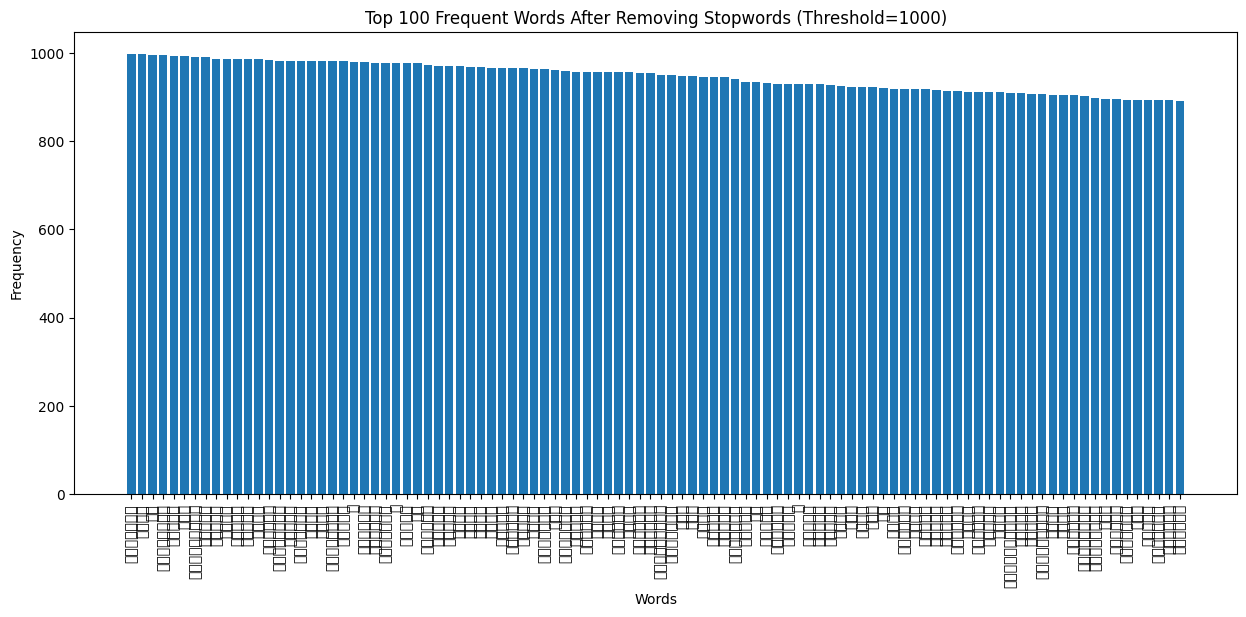

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2793 (\N{GUJARATI DIGIT THREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2792 (\N{GUJARATI DIGIT TWO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2794 (\N{GUJARATI DIGIT FOUR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


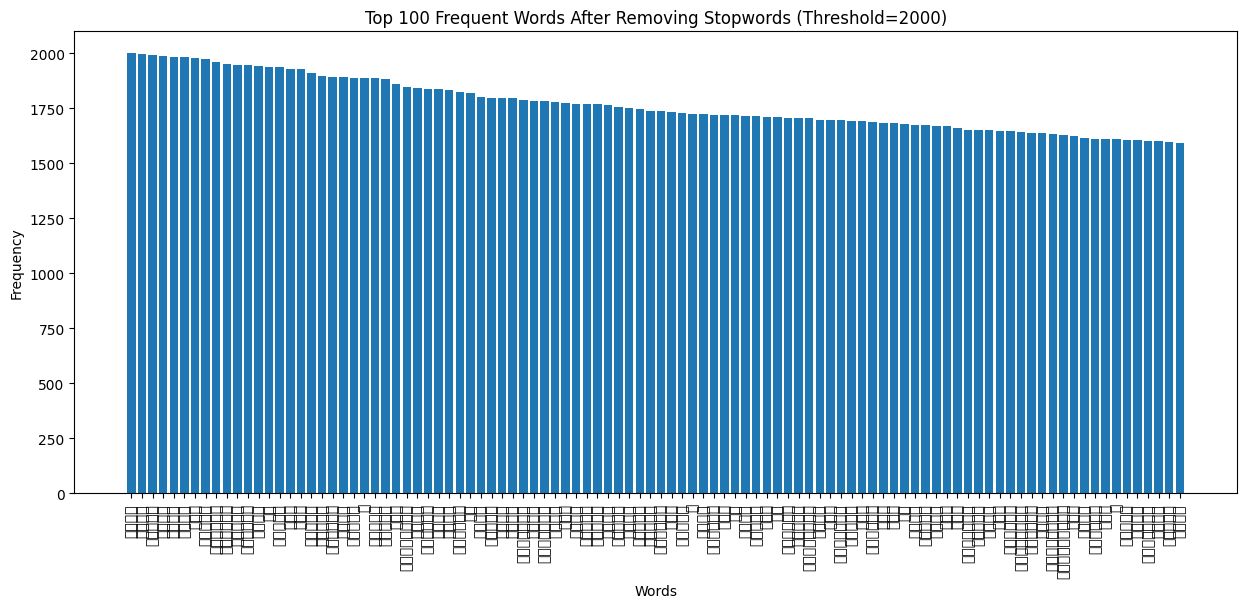

In [10]:
thresholds = [500, 1000, 2000]  # Adjust based on dataset size

for t in thresholds:
    filtered = remove_stopwords_by_threshold(freq_dict, t)
    sorted_filtered = sorted(filtered.items(), key=lambda x: x[1], reverse=True)[:100]

    words = [w for w, _ in sorted_filtered]
    counts = [c for _, c in sorted_filtered]

    plt.figure(figsize=(15, 6))
    plt.bar(words, counts)
    plt.xticks(rotation=90)
    plt.title(f"Top 100 Frequent Words After Removing Stopwords (Threshold={t})")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()